<a href="https://colab.research.google.com/github/johnpharmd/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import mstats

In [0]:
doomed = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')


In [3]:
doomed.shape

(80053, 27)

In [0]:
doomed.describe()

In [198]:
doomed.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
doomed.sample(1).T

In [34]:
doomed.timestamp.describe()

count                          80053
unique                         80053
top       2017-08-22 16:00:06.493738
freq                               1
Name: timestamp, dtype: object

In [37]:
doomed.timestamp = pd.to_datetime(doomed.timestamp)
doomed.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

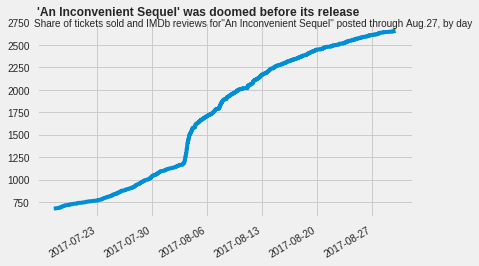

In [210]:
# Data
# doomed.set_index('timestamp', inplace=True)

# Plot
plt.style.use('fivethirtyeight')
ax = doomed[doomed.category == 'IMDb users'].respondents.plot.line()

# ax.get_legend().remove()

ax.set_title("'An Inconvenient Sequel' was doomed before its release",
             loc='left', fontsize=12, fontweight='bold')
plt.suptitle('Share of tickets sold and IMDb reviews for' +
             '"An Inconvenient Sequel" posted through Aug.27, by day',
             x=0.58, y=0.89, fontsize=10)

ax.set(xlabel='')
ax.set_xticks(['2017-07-23', '2017-07-30', '2017-08-06', '2017-08-13',
               '2017-08-20', '2017-08-27']);
# ax.set_yticks(['0', '20', '40', '60', '80', '100%']);


In [0]:
doomed['2017-08-29']